In [2]:
reward_history_psiTrue = []
reward_history_psiFalse = []
step_history_psiTrue = []
step_history_psiFalse = []
import numpy as np
import seaborn
import matplotlib.pyplot as plt
max_iteration = 50
markers = [i * 10 for i in range(1,6)]
#markers[-1] = markers[-1]-1
import pandas as pd
Trials_rewards = []
test_types= ["psiRemoved"]
tanh = ["True", "False"]
tth = "True"
trial = 1
#psiomega =  np.reshape(['psi+omega']*max_iteration,(max_iteration,1))
#psitheta =  np.reshape(['psi+theta']*max_iteration,(max_iteration,1))
omegatheta =  np.reshape(['omega+theta']*max_iteration,(max_iteration,1))
#theta =  np.reshape(['theta']*max_iteration,(max_iteration,1))
#omega =  np.reshape(['omega']*max_iteration,(max_iteration,1))
#psi =  np.reshape(['psi']*max_iteration,(max_iteration,1))
Trials_steps = []
x_axis = np.reshape([i for i in range(max_iteration)],(max_iteration,1))
type = "psiRemoved"
df = pd.DataFrame(columns=['Trial','Iteration','Reward','Step','testType','tanh'])
for marker in markers:
    #trial_1_marker_0_results_trial_1_with_psi_restriction_True_randomised_state_True_goal_False_test_psiRemoved_tanh_False.npy
    reward_temp_psiTrue =np.load("runs/trial_"+str(trial)+"_marker_"+str(marker)+"_results_trial_"+str(trial)+"_with_psi_restriction_True_randomised_state_True_goal_False_test_psiRemoved_tanh_True.npy")
    action_temp = np.load("runs/trial_1_marker_"+str(marker)+"_action_history_trial_1_with_psi_restriction_True_randomised_state_True_goal_False_test_psiRemoved_tanh_True.npy")
    #reward_temp_psiFalse =np.load("runtesla/Trial_"+str(trial)+"_marker_"+str(marker)+"_reward_history_Trial_1_with_psi_restriction_False_randomised_state_True_goal_False.npy")
    #step_temp_psiFalse =np.load("runtesla/Trial_"+str(trial)+"_marker_"+str(marker)+"_step_history_Trial_1_with_psi_restriction_False_randomised_state_True_goal_False.npy")
    reward_history_psiTrue.append(reward_temp_psiTrue)
    #reward_history_psiFalse.append(reward_temp_psiFalse)
    #step_history_psiTrue.append(step_temp_psiTrue)
    #step_history_psiFalse.append(step_temp_psiFalse)
action_temp = np.load("runs/trial_1_marker_"+str(marker)+"_action_history_trial_1_with_psi_restriction_True_randomised_state_True_goal_False_test_psiRemoved_tanh_True.npy")
a  = np.asarray(reward_history_psiTrue)[:,0,:]
y_axis_reward = np.reshape(np.concatenate(a,axis=0), (max_iteration,1))
trials = np.reshape([trial]*max_iteration,[max_iteration,1])
hue = np.reshape([type]*max_iteration,[max_iteration,1])
th = np.reshape([tth]*max_iteration, [max_iteration,1])
#print(np.shape(add_reward))
#reward_history_psiTrue = pd.DataFrame(add_reward,columns=['Iteration','Reward'])
#reward_history_psiFalse = np.concatenate(reward_history_psiFalse,axis=0)
b = np.asarray(reward_history_psiTrue)[:,1,:]
y_axis_step = np.reshape(np.concatenate(b,axis=0), (max_iteration,1))
add_reward =  np.concatenate([trials,x_axis,y_axis_reward,y_axis_step,hue,th],axis=1)
Trials_rewards.append(add_reward)
#step_history_psiFalse = np.concatenate(step_history_psiFalse,axis=0)
#seaborn.lineplot(data=reward_history_psiTrue,x='Iteration', y='Reward')
#print(trial)
total_data = trial * max_iteration
Trials_rewards = np.reshape(Trials_rewards, (total_data,6))
#print(np.shape(Trials_rewards))
df = pd.concat([df,pd.DataFrame(Trials_rewards,columns=['Trial','Iteration','Reward','Step','testType','tanh'])])

FileNotFoundError: [Errno 2] No such file or directory: 'runs/trial_1_marker_10_results_trial_1_with_psi_restriction_True_randomised_state_True_goal_False_test_psiRemoved_tanh_True.npy'

(101, 50, 12)
90.0


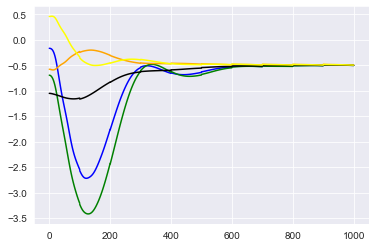

In [8]:
import numpy as np
last_iteration = np.load("runsarchived/last_state_trial_1_with_psi_restriction_True_randomised_state_True_goal_False_test_psiRemoved_tanh_True.npy")
batch_size = 5
pseudo_trajectory_length = 1000
trajectory_length = 100
batch_size *= pseudo_trajectory_length // trajectory_length

timesteps = []
print(np.shape(last_iteration))
print((np.pi/2) * 180 / np.pi)

omega = last_iteration[:,:,0]
time_steps = last_iteration[:, :, -1]
colors = ['red', 'blue', 'green', 'orange', 'black', 'yellow', 'purple', 'pink', 'olive', 'cyan']
col = 0

for trajectory_number in range(batch_size):
    if last_iteration[0, trajectory_number, -1] == 0:
        col = (col + 1) % len(colors)
    conv_omega = omega[:, trajectory_number] * 180 / np.pi
    plt.plot(time_steps[:, trajectory_number], conv_omega,color=colors[col])

plt.savefig("biketanhTrue.pdf")

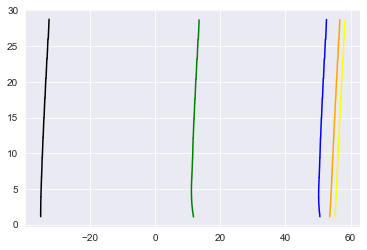

In [9]:
x_f = last_iteration[:,:,5]
y_f = last_iteration[:,:,6]
col = 0

for trajectory_number in range(batch_size):
    if last_iteration[0, trajectory_number, -1] == 0:
        col = (col + 1) % len(colors)
    x = x_f[:, trajectory_number]
    y = y_f[:, trajectory_number]
    plt.plot(x, y, color=colors[col])

plt.savefig("bikebehaveTanhTrue.pdf")